In [567]:
import pandas as pd
import sklearn
import numpy as np
import random
import re
import os
import sys
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.cm as cm
import time
from mpl_toolkits.mplot3d import Axes3D

In [82]:
from sklearn.neighbors import NearestNeighbors as NN

In [89]:
samples = [[1., 1., 1.], 
           [0,0,0],
           [-1, -1, -1],
           #[0., .5, 0.], 
           #[1., 1., .5], 
          ]

In [90]:
neigh = NearestNeighbors(n_neighbors=1, algorithm="brute", p=2, metric="minkowski")

In [91]:
neigh.fit(samples)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [92]:
distance, indices = neigh.kneighbors([1,-1,1], n_neighbors=1, return_distance=True)

/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [93]:
distance

array([[ 1.73205081]])

In [94]:
[samples[idx] for idx in indices]

/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


[[0, 0, 0]]

In [466]:
from sklearn.cluster import KMeans

In [473]:
A = {}
for idx in range(1000):
    A["%s"%idx] = np.random.multivariate_normal(mean=[idx,idx], cov=np.array([[.1*idx**2,0], [0,.1*idx**2]]), size=20)
B = np.vstack([A["%s"%idx] for idx in range(len(A))])

In [474]:
B.shape

(20000, 2)

In [475]:
numclusters = 10
kmeans = KMeans(n_clusters=numclusters, random_state=0).fit(B)

In [476]:
kmeans.labels_

array([2, 2, 2, ..., 9, 9, 5], dtype=int32)

In [477]:
colors = cm.rainbow(np.linspace(0, 1, numclusters))

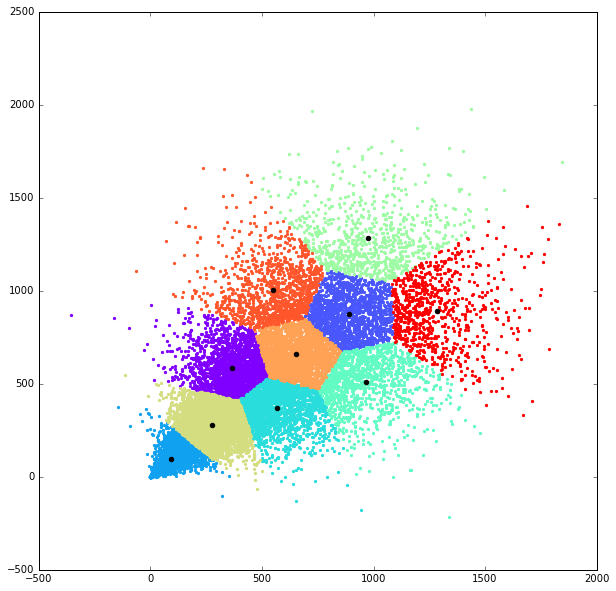

In [478]:
A = {}
for idx in range(1000):
    A["%s"%idx] = np.random.multivariate_normal(mean=[idx,idx], cov=np.array([[.1*idx**2,0], [0,.1*idx**2]]), size=20)
B = np.vstack([A["%s"%idx] for idx in range(len(A))])

numclusters = 10
kmeans = KMeans(n_clusters=numclusters, random_state=0).fit(B)

colors = cm.rainbow(np.linspace(0, 1, numclusters))

segment={}
for label in range(numclusters):
    segment["%s"%label] = B[[idx for idx in range(len(B)) if kmeans.labels_[idx]==label]]
    plt.scatter(segment["%s"%label][:, 0], segment["%s"%label][:, 1], color=colors[label], marker = ".")
#plt.scatter(rights[:, 0], rights[:, 1], color="b", marker = "+")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="o")
plt.show()

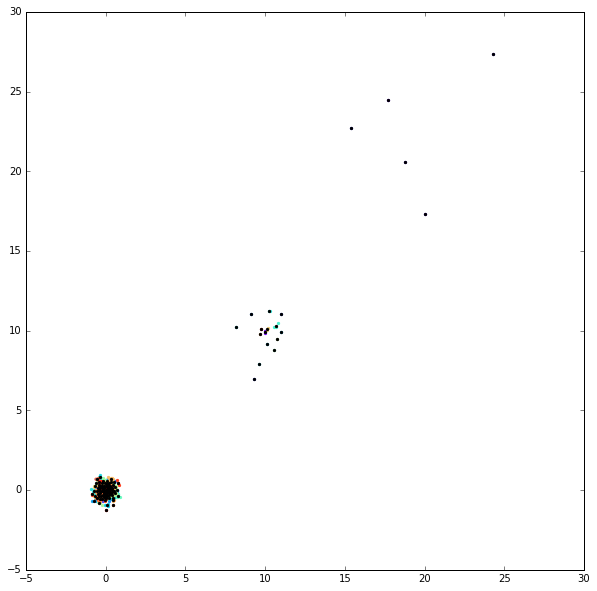

In [599]:
A = {}
#for idx in range(1000):
#    A["%s"%idx] = np.random.multivariate_normal(mean=[idx,idx], cov=np.array([[.1*idx**4,0], [0,.1*idx**4]]), size=20)
A["0"] = np.random.multivariate_normal(mean=[0,0], cov = np.array([[.1,0], [0,.1]]), size = 1000)
A["1"] = np.random.multivariate_normal(mean=[10,10], cov = np.array([[1,0], [0,1]]), size = 20)
A["2"] = np.random.multivariate_normal(mean=[20,20], cov = np.array([[10,0], [0,10]]), size = 5)
B = np.vstack([A["%s"%idx] for idx in range(len(A))])

numclusters = 100
kmeans = KMeans(n_clusters=numclusters, random_state=0).fit(B)

colors = cm.rainbow(np.linspace(0, 1, numclusters))

segment={}
for label in range(numclusters):
    segment["%s"%label] = B[[idx for idx in range(len(B)) if kmeans.labels_[idx]==label]]
    plt.scatter(segment["%s"%label][:, 0], segment["%s"%label][:, 1], color=colors[label], marker = ".")
#plt.scatter(rights[:, 0], rights[:, 1], color="b", marker = "+")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker=".")
plt.show()

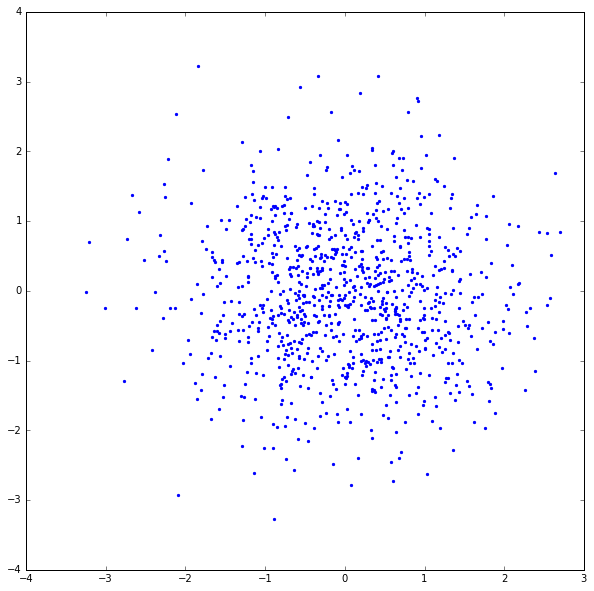

In [479]:
H = np.random.multivariate_normal(mean=[0,0], cov = np.array([[1,0], [0,1]]), size =1000)
plt.scatter(H[:, 0], H[:, 1], color="b", marker=".")
plt.show()

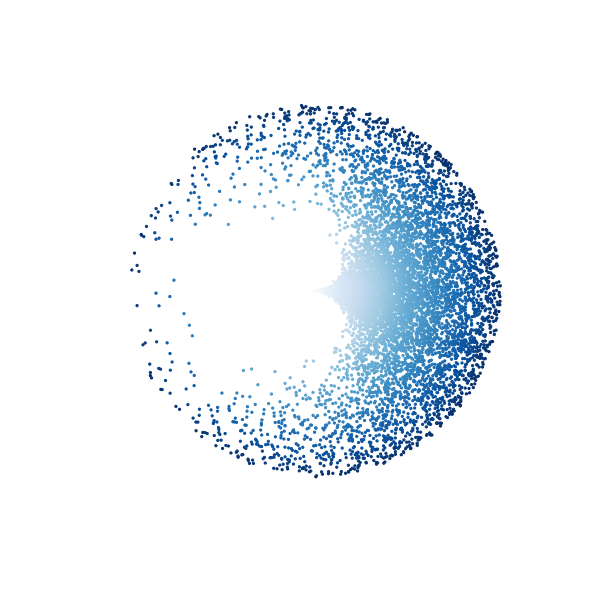

In [524]:
plt.clf()
num_points = 10000
colors = cm.Blues(np.linspace(0, 1, num_points))
G = np.random.normal(loc = 0., scale = .2, size = num_points)
scaling = np.linspace(0,1,num_points)
G_prime = G*scaling
plt.scatter(scaling*np.cos(2*np.pi*G_prime), scaling*np.sin(2*np.pi*G_prime), color=colors, marker=".")
plt.axis("off")
plt.show()

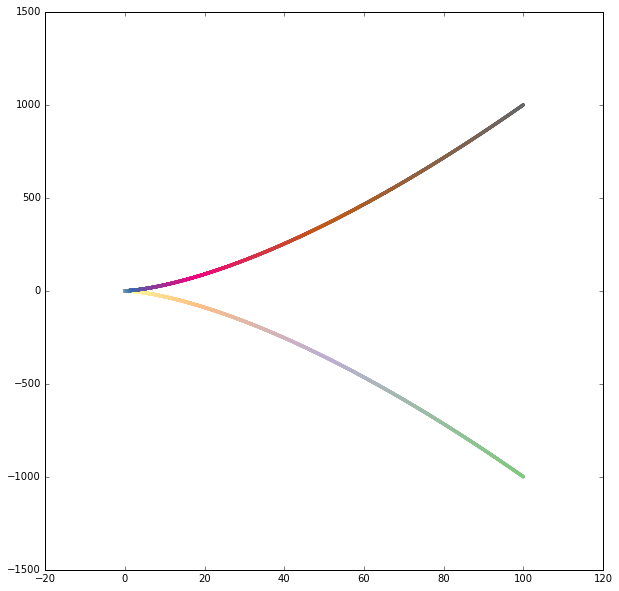

In [544]:
J = np.array([[t**2, t**3] for t in np.linspace(-10,10, 10000)])
colors = cm.Accent(np.linspace(0,1, (len(J))))
plt.scatter(J[:,0], J[:,1], color=colors, marker=".")

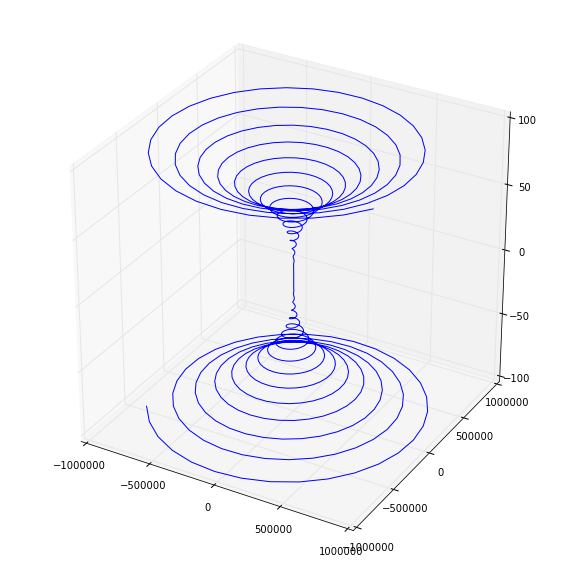

In [566]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

temp = np.array([[t**3*np.cos(t), t**3*np.sin(t), t] for t in np.linspace(-100,100,1000)])
colors = cm.Blues(0,1, len(temp))
ax.plot(xs=temp[:,0], ys = temp[:, 1], zs = temp[:, 2],)